Implementation of Kaplan Meier Curves

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from ipynb.fs.full.get_data import getTFData

In [3]:
train, test = getTFData(sets = [1])

In [4]:
data = [[0 , 1.0]]
survivaltimestrain = train[['id','rul']].groupby('id').max()
survivaltimestest = test[['id','rul']].groupby('id').max()
lifetimes = survivaltimestrain['rul'].tolist() + survivaltimestest['rul'].tolist()
lifetimes.sort()
nTimeseries = len(lifetimes)
survivers = nTimeseries
failures = 0
for j in sorted(set(lifetimes)):
    failures = lifetimes.count(j)
    survivers = survivers - failures
    data.append([j, survivers/nTimeseries])

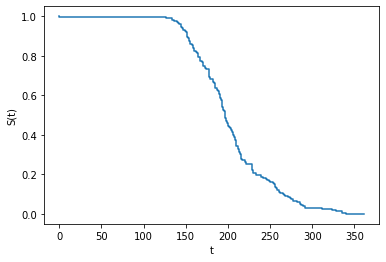

In [6]:
x = [row[0] for row in data]
y = [row[1] for row in data]
plt.step(x, y)
plt.ylabel('S(t)')
plt.xlabel('t')
plt.show()